### Assignment's goal:

**Load**, **inspect** and **clean** the data. Split the data into a **training set** and a **validation set** and a **test set**. Use a simple **classifier as a baseline**. **Train various classifiers**. **Motivate your choice** in relation to the characteristics of the dataset. Try to combine them into an **ensemble learning model** that outperforms all of the others. Please see the attached excel-file for the specific grading matrix.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [32]:
# loading the data
df = pd.read_csv('./data/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Inspecting the data


In [13]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [15]:
empty_values = df.isna().sum().sum()

print("Dataframe's shape:", df.shape)
print("Amount of empty values:", empty_values)
df.describe()

Dataframe's shape: (195, 24)
Amount of empty values: 0


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Healthy patients percentage: 24.62%
Unhealthy patients percentage: 75.38%


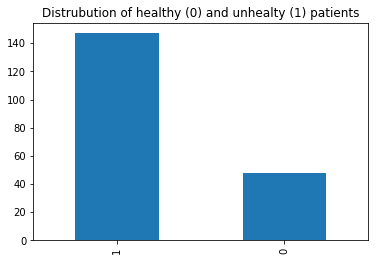

In [24]:
df.status.value_counts().plot(title="Distrubution of healthy (0) and unhealty (1) patients", kind="bar")
unhealthy, healthy = df.status.value_counts()/df.shape[0]
print(f'Healthy patients percentage: {healthy*100:.2f}%\nUnhealthy patients percentage: {unhealthy*100:.2f}%')

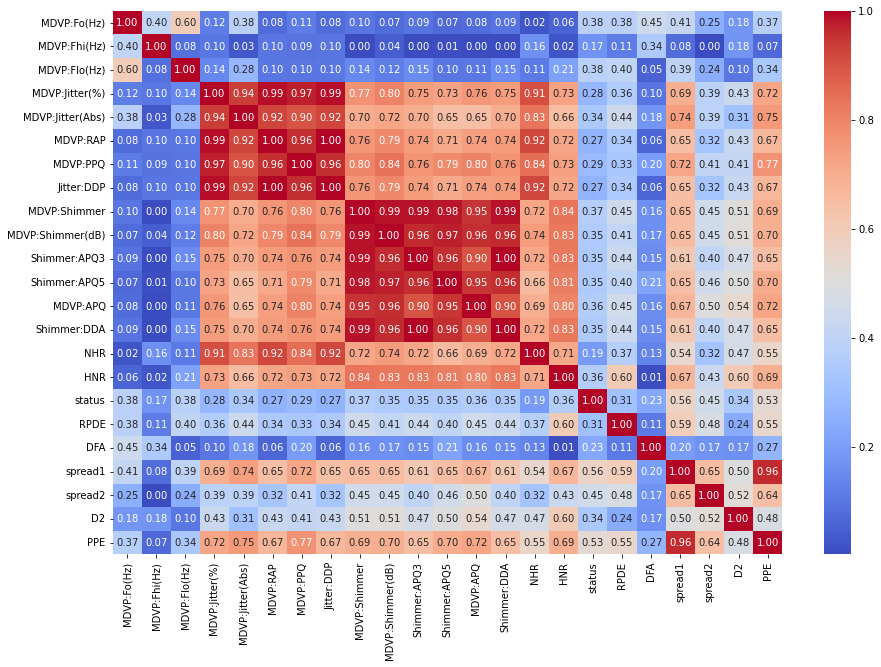

In [5]:
# plotting correlation heatmap
# exclude correlations close to 1 but keep the other column
plt.figure(figsize = (15,10))
dataplot = sns.heatmap(df.corr().abs(), annot=True, fmt='0.2f', cmap="coolwarm")
plt.show()

Because 23 features are way too many dimensions to work with we'll be looking at the correlation heatmap and the parkisons.names file to deduce which features are redundant. Columns with an overall correlation close to 1 seem to be too correlated to use as well as multiple columns describing the same thing (seeing them grouped in the pariksons.names file as well in the red blocks in the heatmap) e.g. MVDP:Jitter(%) and MVDP:Jitter(Abs). Picking the lowest correlated column from each group and filtering similar features leaves us with the following columns: MVDP:Fo(HZ), MVDP:FHI(HZ), MDVP:Flo(HZ), MDVP:Jitter(Abs), MDVP:APQ, HNR, RPDE, DFA, spread2.

In [25]:
#fill X matrix and y vector
cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:APQ', 'HNR', 'RPDE', 'DFA', 'spread2']
y = np.array(df['status'])
X = np.array(df[cols])
X.shape

(195, 9)

In [26]:
# Normalize the data
def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)

In [33]:
# Split the data
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

#cross validation
cv = ShuffleSplit(n_splits=100, test_size=test_size, random_state=0)

In [34]:
def evaluate(y_test, y_pred, X_test, clf):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
      
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')

In [35]:
#train the data
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# evaluation
y_pred = lg.predict(X_test)
evaluate(y_test, y_pred, X_test, lg)

[[10  4]
 [ 4 41]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.91      0.91      0.91        45

    accuracy                           0.86        59
   macro avg       0.81      0.81      0.81        59
weighted avg       0.86      0.86      0.86        59



test  acc: 0.864406779661017
train acc: 0.8455882352941176


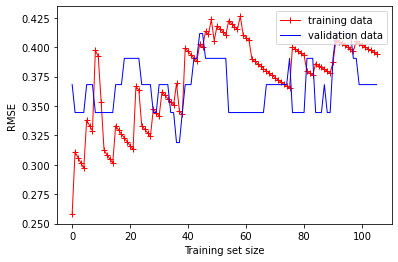

In [40]:
plot_learning_curves(lg, X_train, y_train, X_test, y_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dt.predict(X_test)
evaluate(y_test, y_pred, X_test, dt)

[[ 8  6]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.88      0.93      0.90        45

    accuracy                           0.85        59
   macro avg       0.80      0.75      0.77        59
weighted avg       0.84      0.85      0.84        59

